In [1]:
#Hierarchial Clustering: Agglomerative Hierarchial Clsutering
#works on bottom to top approach

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Segments.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  150 non-null    float64
 1   Feature 2  150 non-null    float64
 2   Feature 3  150 non-null    float64
 3   Feature 4  150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.duplicated().sum()

3

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
#apply scaling
from sklearn.preprocessing import StandardScaler
#create object of standardscaler
ss=StandardScaler()
X=ss.fit_transform(df)
type(df)

pandas.core.frame.DataFrame

In [7]:
#using dendogram method to find the optimal number of clusters in given dataset with the help of Income and Spend
#which we have held in X numpy array

In [8]:
!pip install scipy

In [9]:
import scipy.cluster.hierarchy as sch

#from scipy.cluster import hierarchy as sch

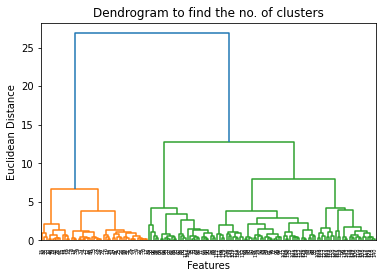

In [10]:
dendro=sch.dendrogram(sch.linkage(X, method='ward')) #ward method means euclidean distance

plt.title('Dendrogram to find the no. of clusters')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

In [11]:
#we can see that no. of clusters is 4
#perform model with Agglomerative Hierarchial clustering
#to give the cluster to each row in given dataset


In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
ac= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [14]:
#train the model and allot category of each row
Y_pred= ac.fit_predict(X)


In [15]:
#add new column in df_new dataset
df['Target']=Y_pred
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Target
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [16]:
ss=StandardScaler()
df['Feature 1']=ss.fit_transform(df[['Feature 1']])
df['Feature 2']=ss.fit_transform(df[['Feature 2']])
df['Feature 3']=ss.fit_transform(df[['Feature 3']])
df['Feature 4']=ss.fit_transform(df[['Feature 4']])

In [21]:
df0=df[df['Target']==0]
df1=df[df['Target']==1]
df2=df[df['Target']==2]
df3=df[df['Target']==3]
df4=df[df['Target']==4]

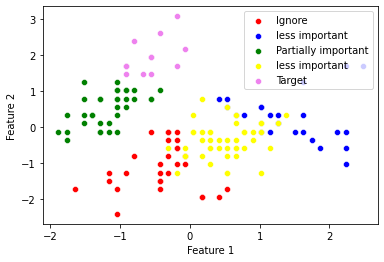

In [24]:
#make scatterplot for visualization for Feature 1 and 2
sns.scatterplot(data=df0, x='Feature 1', y='Feature 2', color='red', label='Ignore')
sns.scatterplot(data=df1, x='Feature 1', y='Feature 2', color='blue', label='less important')
sns.scatterplot(data=df2, x='Feature 1', y='Feature 2', color='green', label='Partially important')
sns.scatterplot(data=df3, x='Feature 1', y='Feature 2', color='yellow', label='less important')
sns.scatterplot(data=df4, x='Feature 1', y='Feature 2', color='violet', label='Target')
plt.show()

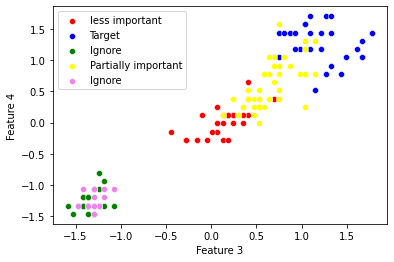

In [26]:
#make scatterplot for visualization for feature 3 and 4
sns.scatterplot(data=df0, x='Feature 3', y='Feature 4', color='red', label='less important')
sns.scatterplot(data=df1, x='Feature 3', y='Feature 4', color='blue', label='Target')
sns.scatterplot(data=df2, x='Feature 3', y='Feature 4', color='green', label='Ignore')
sns.scatterplot(data=df3, x='Feature 3', y='Feature 4', color='yellow', label='Partially important')
sns.scatterplot(data=df4, x='Feature 3', y='Feature 4', color='violet', label='Ignore')
plt.show()